# 3. CNN 이용하여 MINST 분류하기 

## Import modules

In [1]:
import tensorflow as tf

## 데이터 불러오기

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

## 네트워크 구조 정의

#### ㅇ CNN 입력 구조 : 4차원 : Batch * Height * Weidth * Channel

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28 ,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28 ,1)
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', 
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64,(2,2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

## Keras 모델 Compile

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [9]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [10]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

## 학습 수행

In [11]:
EPOCHS = 5
BATCH_SIZE = 1024

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [14]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/5
59/59 [==============================] - 35s 34ms/step - loss: 1.2339 - accuracy: 0.6231 - val_loss: 0.1797 - val_accuracy: 0.9475

Epoch 00001: val_accuracy improved from -inf to 0.94750, saving model to best_model.h5
Epoch 2/5
59/59 [==============================] - 1s 24ms/step - loss: 0.2003 - accuracy: 0.9404 - val_loss: 0.0805 - val_accuracy: 0.9763

Epoch 00002: val_accuracy improved from 0.94750 to 0.97630, saving model to best_model.h5
Epoch 3/5
59/59 [==============================] - 1s 23ms/step - loss: 0.1070 - accuracy: 0.9684 - val_loss: 0.0585 - val_accuracy: 0.9817

Epoch 00003: val_accuracy improved from 0.97630 to 0.98170, saving model to best_model.h5
Epoch 4/5
59/59 [==============================] - 1s 24ms/step - loss: 0.0817 - accuracy: 0.9746 - val_loss: 0.0459 - val_accuracy: 0.9855

Epoch 00004: val_accuracy improved from 0.98170 to 0.98550, saving model to best_model.h5
Epoch 5/5
59/59 [==============================] - 1s 24ms/step - loss: 0.0696

## 학습 결과 테스트

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9870


[0.03778849542140961, 0.9869999885559082]

## 성능 그래프

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x_range = range(1,len(history.history['accuracy'])+1)

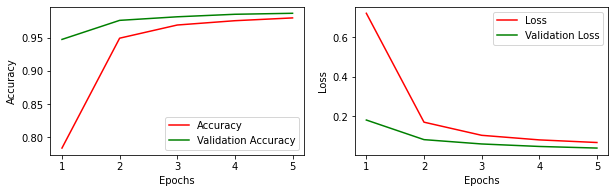

In [18]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 실전 테스트

In [19]:
x_test[0].shape

(28, 28, 1)

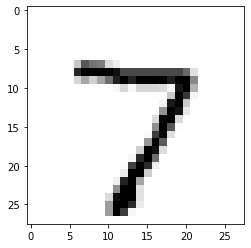

The Answer is  [7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [20]:
n = 0
plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape(1,28,28,1)))

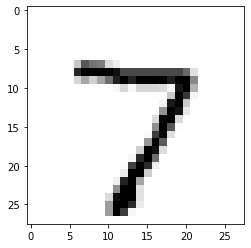

The Answer is  [[1.0381891e-07 5.7733256e-08 2.7303606e-06 3.7218097e-06 1.6654853e-08
  2.4991026e-08 4.0162679e-10 9.9999070e-01 6.5344643e-08 2.6799366e-06]]


In [21]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict(x_test[n].reshape(1,28,28,1)))